In [ ]:
Trong thống kê học và máy học giảm chiều số liệu là quá trình cắt giảm đi các tính năng không cần thiết
hoặc là ít ảnh hưởng đến các đối tượng. Giúp cho quá trình sử lý nhanh hơn và tránh được các 
nhiễu không cần thiết. Dễ dàng hơn trong việc mô hình hóa.

# Principal components analysis (PCA)

Phân tích thành phần chính là phương pháp giảm chiều dữ liệu không giám sát. Nghĩa là xem xét mối tương quan
của các thuộc tính và nhóm vào thành 1 thành phần. cơ sở để phân nhóm là xem xét mối quan hệ tương quan của các tính năng
Trong phương pháp này tối đa hóa lượng phương sai cho các tính năng. 
Nói cách khác là bộ số liệu từ có n tính năng, sau khi PCA sẽ còn lại k tính năng (k < n) mà sự mất mát dữ liệu là tối thiểu

[ 0.93646607  0.06353393]


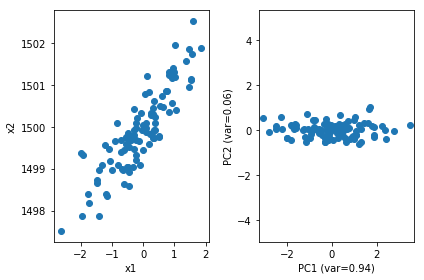

In [47]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(42)

# dataset
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
# bong = 123 + np.random.normal(size=n_samples, scale=.5)
# loc = experience + np.random.normal(size=n_samples, scale=.5) + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

# PCA with scikit-learn
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

PC = pca.transform(X)
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1"); plt.ylabel("x2")
plt.subplot(122)
plt.scatter(PC[:, 0], PC[:, 1])
plt.xlabel("PC1 (var=%.2f)" % pca.explained_variance_ratio_[0])
plt.ylabel("PC2 (var=%.2f)" % pca.explained_variance_ratio_[1])
plt.axis('equal')
plt.tight_layout()
plt.show()

# Multi-dimensional Scaling (MDS)

 Đó là một hình thức giảm chiều không tuyến tính. Một thuật toán MDS nhằm đặt từng đối tượng trong không gian N chiều sao cho khoảng cách giữa các đối tượng được bảo tồn tốt nhất có thể. Mỗi đối tượng sau đó được gán tọa độ trong mỗi kích thước N chiều. 
    Số lượng kích thước có thể vượt quá 2 và được xác định trước. Chọn N = 2 tối ưu hóa các vị trí của đối tượng cho một mô hình phân tán hai chiều.
    Ví dụ có 10 thành phố ở Việt Nam và ma trận khoảng cách giữ các thành phố đó. Ta có thể sử dụng 2 chiều không gian để biểu thị tọa độ của mỗi thành phố đó sao cho khoảng cách giữa các thành phố không bị thay đổi.
    

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pairwise distance between European cities
try:
    url = '../data/eurodist.csv'
    df = pd.read_csv(url)
except:
    url = 'https://raw.github.com/neurospin/pystatsml/master/data/eurodist.csv'
    df = pd.read_csv(url)
    
print(df.ix[:5, :5])
#print(df)
city = df["city"]
D = np.array(df.ix[:, 1:]) # Distance matrix

# Arbitrary choice of K=2 components
from sklearn.manifold import MDS
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40, max_iter=3000, eps=1e-9)
X = mds.fit_transform(D)

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460
5    Cologne    2762       1498       206     409


C:\Users\lhtam\AppData\Local\Programs\Python\Python36-32\Lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


Recover coordinates of the cities in Euclidean referential whose orientation is arbitrary:

In [49]:
from sklearn import metrics
Deuclidean = metrics.pairwise.pairwise_distances(X, metric='euclidean')
print(np.round(Deuclidean[:5, :5]))

[[    0.  3116.  2994.  3181.  3428.]
 [ 3116.     0.  1317.  1289.  1128.]
 [ 2994.  1317.     0.   198.   538.]
 [ 3181.  1289.   198.     0.   358.]
 [ 3428.  1128.   538.   358.     0.]]


Plot the results:

In [55]:
# Plot: apply some rotation and flip
theta = 80 * np.pi / 180.
rot = np.array([[np.cos(theta), -np.sin(theta)],
[np.sin(theta), np.cos(theta)]])
Xr = np.dot(X, rot)

# flip x
Xr[:, 0] *= -1
plt.scatter(Xr[:, 0], Xr[:, 1])
for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
plt.axis('equal')

ValueError: shapes (1000,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

[48644495.285714284, 3356497.3657523859, 2858455.4958879622, 2756310.6376280114]


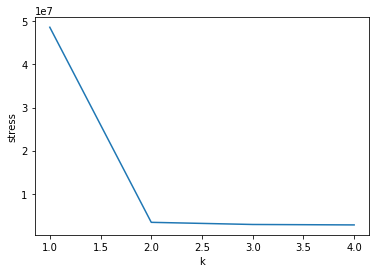

In [56]:
k_range = range(1, min(5, D.shape[0]-1))
stress = [MDS(dissimilarity='precomputed', n_components=k,
random_state=42, max_iter=300, eps=1e-9).fit(D).stress_ for k in k_range]
print(stress)
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")
plt.show()

# Nonlinear dimensionality reduction

Isomap là một phương pháp giảm chiều không tuyến tính kết hợp một thủ tục để tính ma trận khoảng cách với MDS. 
Tính toán khoảng cách dựa trên khoảng cách đo đạc trên đồ thị khu phố:
1. Determine the neighbors of each point.
      - All points in some fixed radius.
      - K nearest neighbors.
2. Construct a neighborhood graph.
      - Each point is connected to other if it is a K nearest neighbor.
      - Edge length equal to Euclidean distance.
3. Compute shortest path between two nodes and build them to the distance matrix D.
4. Apply MDS on D.

(-5.4164373180970289,
 5.276311544714793,
 -1.2910940054965334,
 1.2349777101706598)

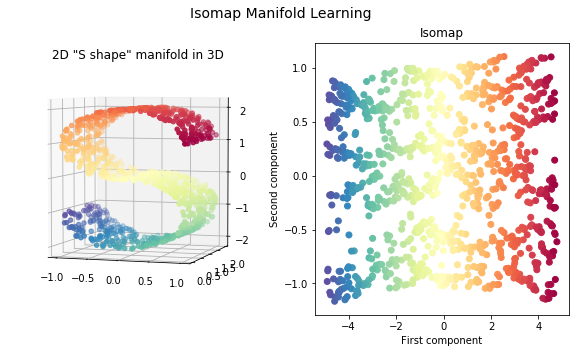

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

X, color = datasets.samples_generator.make_s_curve(1000, random_state=42)
fig = plt.figure(figsize=(10, 5))
plt.suptitle("Isomap Manifold Learning", fontsize=14)
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.title('2D "S shape" manifold in 3D')
Y = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X)
ax = fig.add_subplot(122)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.axis('tight')

